# Energy Consumption Prediction using Liner Refression
## Umang Mittal

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib.request
import datetime
import monthdelta
import zipfile
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
base = datetime.date(2005,1,1)
dates = [base + monthdelta.monthdelta(months=x) for x in range(12)]

In [32]:
list_ = []
for date in dates:
    filename = date.strftime('%Y%m%d') + 'pal_csv.zip'

    url = 'http://mis.nyiso.com/public/csv/pal/' + filename
    print(url)
    urllib.request.urlretrieve(url, './DataFiles/'+filename) 
    with zipfile.ZipFile('./DataFiles/'+filename,"r") as zip_ref:
        try:
            zip_ref.extractall('./DataFiles/Extract/'+filename.replace('.zip',''))
            path ='./DataFiles/Extract/'+filename.replace('.zip','')
            allFiles = glob.glob(path + "/*.csv")
            for file_ in allFiles:
                df = pd.read_csv(file_,index_col=None, header=0)
                list_.append(df)
        except Exception:
            print('Exception Occurred')
        finally:
            zip_ref.close()

frame = pd.concat(list_, axis = 0, ignore_index = True)

http://mis.nyiso.com/public/csv/pal/20050101pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20050201pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20050301pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20050401pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20050501pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20050601pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20050701pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20050801pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20050901pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20051001pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20051101pal_csv.zip
http://mis.nyiso.com/public/csv/pal/20051201pal_csv.zip


In [33]:
frame=frame.drop(['PTID','Time Zone'],axis=1)
frame = frame.groupby(['Time Stamp','Name']).mean().reset_index()

In [34]:
framePivot = frame.pivot(index='Time Stamp',columns='Name',values='Load')
framePivot_Original = framePivot.copy()
framePivot.head(50)

Name,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,N.Y.C._LONGIL,NORTH,WEST
Time Stamp,,,,,,,,,,,,
01/01/2005 00:00:00,1089.0,1627.0,637.0,974.0,1149.0,NaN,689.0,206.0,NaN,7384.0,714.0,1568.0
01/01/2005 00:01:35,1091.0,1615.0,639.0,982.0,1137.0,NaN,683.0,208.0,NaN,7356.0,713.0,1549.0
01/01/2005 00:06:35,1090.0,1618.0,633.0,977.0,1130.0,NaN,685.0,215.0,NaN,7328.0,713.0,1532.0
01/01/2005 00:10:05,1089.0,1606.0,631.0,964.0,1101.0,NaN,677.0,204.0,NaN,7291.0,719.0,1516.0
01/01/2005 00:15:05,1068.0,1617.0,634.0,974.0,1120.0,NaN,682.0,203.0,NaN,7302.0,711.0,1511.0
01/01/2005 00:18:35,1070.0,1601.0,634.0,962.0,1104.0,NaN,686.0,192.0,NaN,7249.0,716.0,1516.0
01/01/2005 00:23:35,1068.0,1598.0,626.0,960.0,1110.0,NaN,683.0,197.0,NaN,7240.0,706.0,1501.0
01/01/2005 00:25:05,1065.0,1587.0,628.0,961.0,1099.0,NaN,672.0,191.0,NaN,7197.0,717.0,1504.0
01/01/2005 00:30:05,1056.0,1583.0,623.0,957.0,1086.0,NaN,665.0,191.0,NaN,7174.0,718.0,1514.0


## Considering Data only for one Area

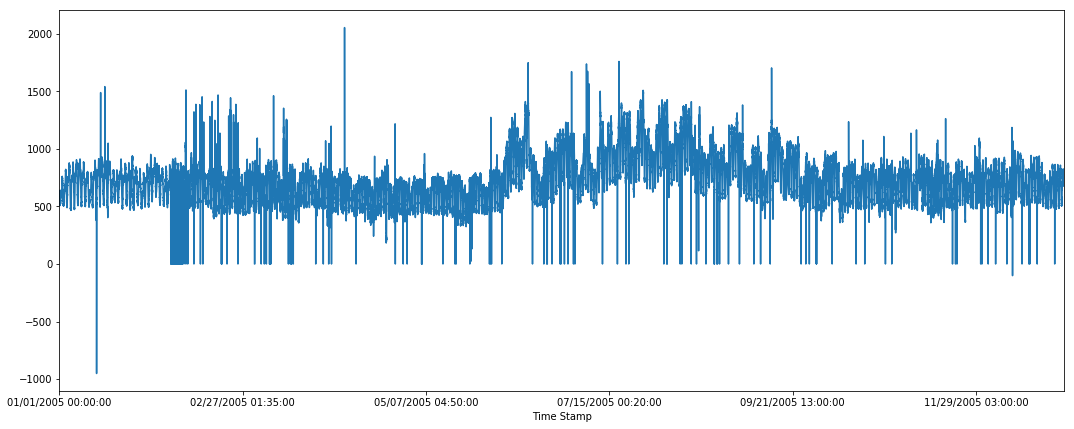

In [35]:
plt.figure(1)
framePivot['DUNWOD'].plot.line(y='Load',figsize=(18,7))

In [36]:
framePivot.isnull().sum()

Name
CAPITL              24
CENTRL              24
DUNWOD              24
GENESE              24
HUD VL              24
LONGIL           12164
MHK VL              24
MILLWD              24
N.Y.C.           12164
N.Y.C._LONGIL    97450
NORTH               24
WEST                24
dtype: int64

In [37]:
framePivot = framePivot.replace(0,np.nan)
framePivot = framePivot.interpolate(method='linear',limit_direction='backward')

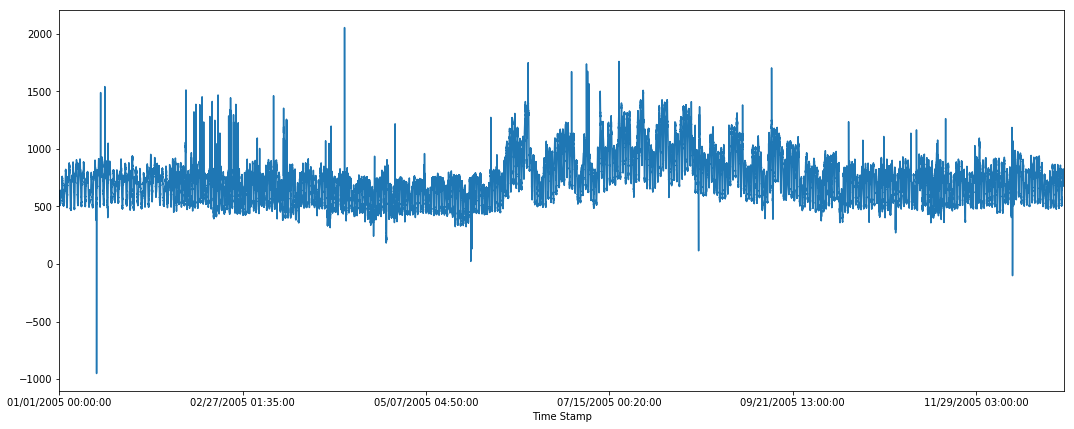

In [38]:
plt.figure(1)
framePivot['DUNWOD'].plot.line(y='Load',figsize=(18,7))

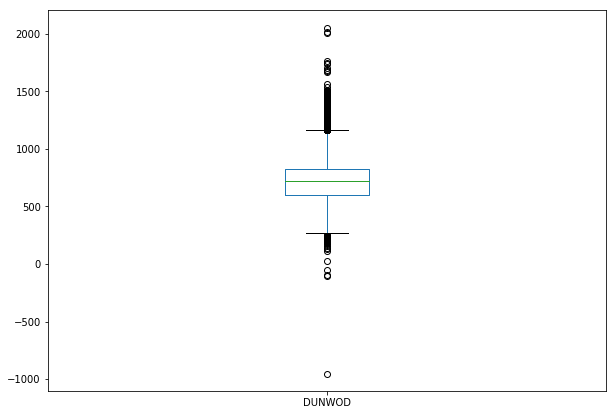

In [47]:
#Finding Outliers
plt.figure(1)
framePivot['DUNWOD'].plot.box(figsize=(10,7))